# Matrices, normas y eigenvalores/eigenvectores.

**Objetivo.**

Revisar e ilustrar los conceptos de matrices, sus normas y eigenvalores/eigenvectores usando la biblioteca `numpy`.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

In [93]:
# Importamos las bibliotecas requeridas
import numpy as np
import sympy
import ipywidgets as widgets
import macti.visual as mvis
import macti.matem as mmat


Sea $A = a_{ij}$ una matriz de $n \times n$, donde $n$ indica la dimensión de la matriz ($n$ renglones por $n$ columnas). Los números $a_{ij}$ son los elementos de la matriz, y $i,j = 1,\dots,n$. La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

$$
A = 
\left(
\begin{array}{cccc}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots& \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}\\
\end{array}
\right)
\,\,\,\,
A^T = 
\left(
\begin{array}{cccc}
a_{11} & a_{21} & \dots & a_{n1}\\
a_{12} & a_{22} & \dots & a_{n2}\\
\vdots & \vdots& \ddots & \vdots \\
a_{1n} & a_{2n} & \dots & a_{nn}\\
\end{array}
\right)
$$

Definamos una matriz usando `numpy`:

In [10]:
A = np.array([[2, 3, 5],
              [1, -4, 8],
              [8, 6, 3]])
A

array([[ 2,  3,  5],
       [ 1, -4,  8],
       [ 8,  6,  3]])

## Matriz transpuesta
La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

In [11]:
AT = A.T
AT

array([[ 2,  1,  8],
       [ 3, -4,  6],
       [ 5,  8,  3]])

## Matriz identidad
La matriz identidad $I$ es aquella donde todas sus entradas son cero excepto en la diagonal donde sus entradas son 1.

In [25]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Matriz inversa
La matriz inversa de $A$ se denota por $A^{-1}$ y es tal que $A^{-1}A = I$.

In [26]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.23715415,  0.08300395,  0.17391304],
       [ 0.24110672, -0.13438735, -0.04347826],
       [ 0.15019763,  0.04743083, -0.04347826]])

In [27]:
np.dot(A, Ainv)

array([[ 1.00000000e+00, -6.93889390e-18,  2.77555756e-17],
       [ 2.22044605e-16,  1.00000000e+00,  0.00000000e+00],
       [ 8.32667268e-17,  3.46944695e-17,  1.00000000e+00]])

## Matriz diagonal
Una matriz $A = {a_{ij}}$ se llama diagonal si $a_{ij}=0, \forall i \ne j$ y se denota por $A = \mbox{diag}$ ${a_{ii}}$.

In [28]:
np.diagonal(A)

array([ 2, -4,  3])

In [29]:
# Diagonales inferiores
np.diagonal(A,1)

array([3, 8])

In [32]:
# Diagonales superiores
np.diagonal(A,-1)

array([1, 6])

## Matriz triangular superior e inferior
Una matriz $A = {a_{ij}}$ se llama triangular superior si $a_{ij} = 0, \forall i > j$ y triangular inferior si $a_{ij} = 0, \forall i < j$.

In [33]:
np.triu(A)

array([[ 2,  3,  5],
       [ 0, -4,  8],
       [ 0,  0,  3]])

In [34]:
np.tril(A)

array([[ 2,  0,  0],
       [ 1, -4,  0],
       [ 8,  6,  3]])

## Matrices simétricas
Una matriz $A$ es sim\'etrica si $A^T = A$ y antisim\'etrica si $A^T = -A$.

In [35]:
def isSymmetric(mat):
    """Checa si una matriz es simétrica """
    transmat = np.array(mat).transpose()
    if np.array_equal(mat, transmat):
        return True
    return False

In [36]:
B = np.array([[2, 3, 5],
              [3, -4, 8],
              [5, 8, 3]])
isSymmetric(B)

True

In [37]:
isSymmetric(A)

False

## Matriz ortogonal
Una matriz $A$ es ortogonal si $A^T A = I$, o equivalentemente $A^T = A^{-1}$.

In [39]:
x = sympy.symbols('x')

# Matriz rotación
rotation = sympy.Matrix([[sympy.cos(x), -sympy.sin(x)],
                        [sympy.sin(x), sympy.cos(x)]])
rotation

Matrix([
[cos(x), -sin(x)],
[sin(x),  cos(x)]])

In [40]:
rotation.T

Matrix([
[ cos(x), sin(x)],
[-sin(x), cos(x)]])

In [41]:
rotation * rotation.T

Matrix([
[sin(x)**2 + cos(x)**2,                     0],
[                    0, sin(x)**2 + cos(x)**2]])

In [44]:
sympy.simplify(rotation * rotation.T)

Matrix([
[1, 0],
[0, 1]])

Esta matriz rota un vector por un cierto número de grados, veamos:

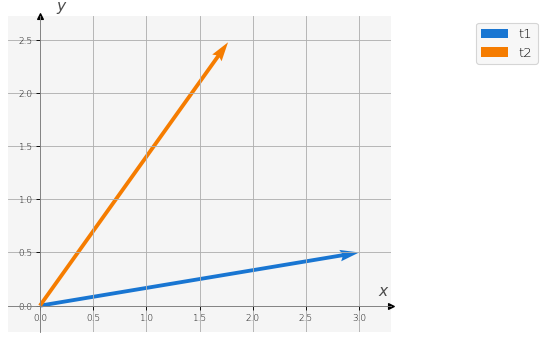

In [76]:
angulo = 45 # ángulo de rotación
t1 = sympy.Matrix([3, 0.5])
t2 = rotation.subs('x', angulo * np.pi / 180).evalf(14) * t1

nt1 = np.array(t1, dtype=float).reshape(2,)
nt2 = np.array(t2, dtype=float).reshape(2,)

# Visualizamos los vectores.
v = mvis.Plotter()  # Definición de un objeto para crear figuras.
v.set_coordsys(1)   # Definición del sistema de coordenadas.
v.plot_vectors(1, [nt1, nt2], ['t1', 't2'], ofx=-0.1) # Graficación de los vectores 'x' y 'y'.
v.grid()  # Muestra la rejilla del sistema de coordenadas.

Cada par de renglones o de columnas de una matriz ortogonal, son ortogonales entre sí. Además la longitud de cada columna o renglón es igual a 1.

In [77]:
# Definimos una matriz ortogonal
C = np.array([[1/3, 2/3, -2/3],
              [-2/3, 2/3, 1/3],
              [2/3, 1/3, 2/3]])

array([[ 0.33333333,  0.66666667, -0.66666667],
       [-0.66666667,  0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333,  0.66666667]])

In [78]:
# Verificamos que es ortogonal
np.dot(C, C.T)

array([[ 1.00000000e+00, -1.54197642e-17,  2.46716228e-17],
       [-1.54197642e-17,  1.00000000e+00, -1.23358114e-17],
       [ 2.46716228e-17, -1.23358114e-17,  1.00000000e+00]])

In [79]:
# Verificamos ortogonalidad entre renglones
np.dot(C[0], C[1])

0.0

In [81]:
# Verificamos ortogonalidad entre columnas
np.dot(C[:,0], C[:,1])

0.0

In [82]:
# Verificamos la norma de los renglones
np.linalg.norm(C[2])

1.0

In [83]:
# Verificamos la norma de las columnas
np.linalg.norm(C[2])

1.0

## Matriz transpuesta conjugada
La matriz $A^*$ representa a la matriz $A$ transpuesta y conjugada. La matriz $A^* = {\bar{a}_{ji}}$ se llama también la adjunta de $A$.

In [67]:
real = np.arange(1,10).reshape(3,3)
imag = np.arange(1,10).reshape(3,3)
C =  real + imag *1.0j
C

array([[1.+1.j, 2.+2.j, 3.+3.j],
       [4.+4.j, 5.+5.j, 6.+6.j],
       [7.+7.j, 8.+8.j, 9.+9.j]])

In [66]:
C.conj().T

array([[1.-1.j, 4.-4.j, 7.-7.j],
       [2.-2.j, 5.-5.j, 8.-8.j],
       [3.-3.j, 6.-6.j, 9.-9.j]])

## Matriz definida positiva

Una matriz $A$ se denomina **positiva definida** si $\langle A\vec{x}, \vec{x}\rangle = \vec{x}^T A\vec{x} > 0$ para cualquier vector no nulo $\vec{x}$ de $\mathbb{R}$. La matriz se llama **positiva semidefinida** si $\vec{x}^T A\vec{x} \ge 0$ para cualquier vector $\vec{x}$ de $\mathbb{R}$. Recordemos que:
$$
\vec{x}^T A\vec{x} = \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j
$$

<div class="alert alert-info">

## **Ejemplo 1.**

<font color="Black">
Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array}
$$

En términos de un sistema lineal, las dos ecuaciones anteriores se escriben como sigue:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular $\vec{x}^T A\vec{x}$ para este ejemplo como sigue:    
</font>
</div>

In [85]:
x, y = sympy.symbols('x y')
X = sympy.Matrix([x, y])
A = sympy.Matrix([[3, 2], [2, 6]])
print(A)

Matrix([[3, 2], [2, 6]])


In [86]:
# Calculamos xT * A * x
pos_def = X.T @ A @ X
pos_def

Matrix([[x*(3*x + 2*y) + y*(2*x + 6*y)]])

In [87]:
# Simplificamos
f = sympy.simplify(pos_def)

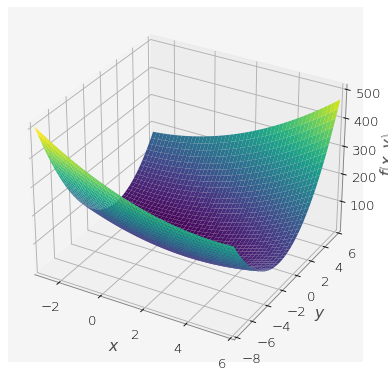

In [90]:
# Graficamos
sympy.plotting.plot3d(f[0], (x, -3, 6), (y, -8, 6))

Podemos calcular los diferentes tipos de norma para estos vectores usando la función `np.linalg.norm()`:

<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black"> 
Determinar si en el siguiente sistema de ecuaciones se tiene una matriz definida positiva:
$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.30 x + 20
\end{array}
$$

Sistema lineal.

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.30 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$
</font>

</div>

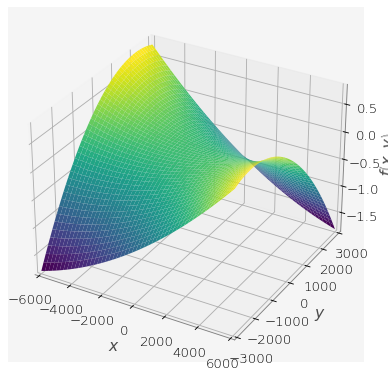

In [91]:
Y = sympy.Matrix([x, y])
B = sympy.Matrix([[0.10, -1], [0.30, -1]])

pos_indef_B = X.T @ B @ X
f_i = sympy.simplify(pos_indef_B)
sympy.plotting.plot3d(f_i[0], (x, -6000, 6000), (y, -3000, 3000))

## Eigenvalores y Eigenvectores

Si $A$ es una matriz cuadrada, entonces definimos el número $\lambda$ (real o complejo) como **autovalor** (**valor propio** o **eigenvalor**) de $A$ si $A\vec{u} = \lambda \vec{u}$, o equivalentemente si $det(A - \lambda I) = 0$. El vector $\vec{u}$ se llama autovector (vector propio o eigenvector) de $A$. El conjunto de todos los autovalores de la matriz $A$ se denomina espectro de $A$.

In [92]:
A

Matrix([
[3, 2],
[2, 6]])

In [95]:
wA, vA = mmat.eigen_land(np.array(A, dtype=float))

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


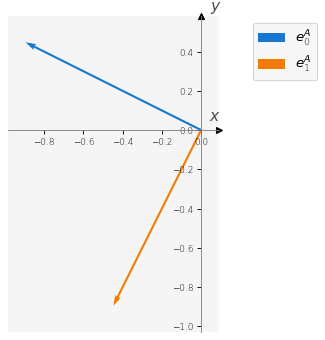

In [98]:
v = mvis.Plotter()
v.set_coordsys()
v.plot_vectors(1, [vA[:,0], vA[:,1]], ['$e_0^A$','$e_1^A$'])

In [99]:
mmat.print_Aulu(A, wA, vA)

𝐴𝑢 = [-1.78885438199983 0.894427190999916]
𝜆𝑢 = [-1.78885438  0.89442719]

𝐴𝑢 = [-3.13049516849971 -6.26099033699941]
𝜆𝑢 = [-3.13049517 -6.26099034]

